# ML Regression

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv("/Users/minsu/Desktop/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [28]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

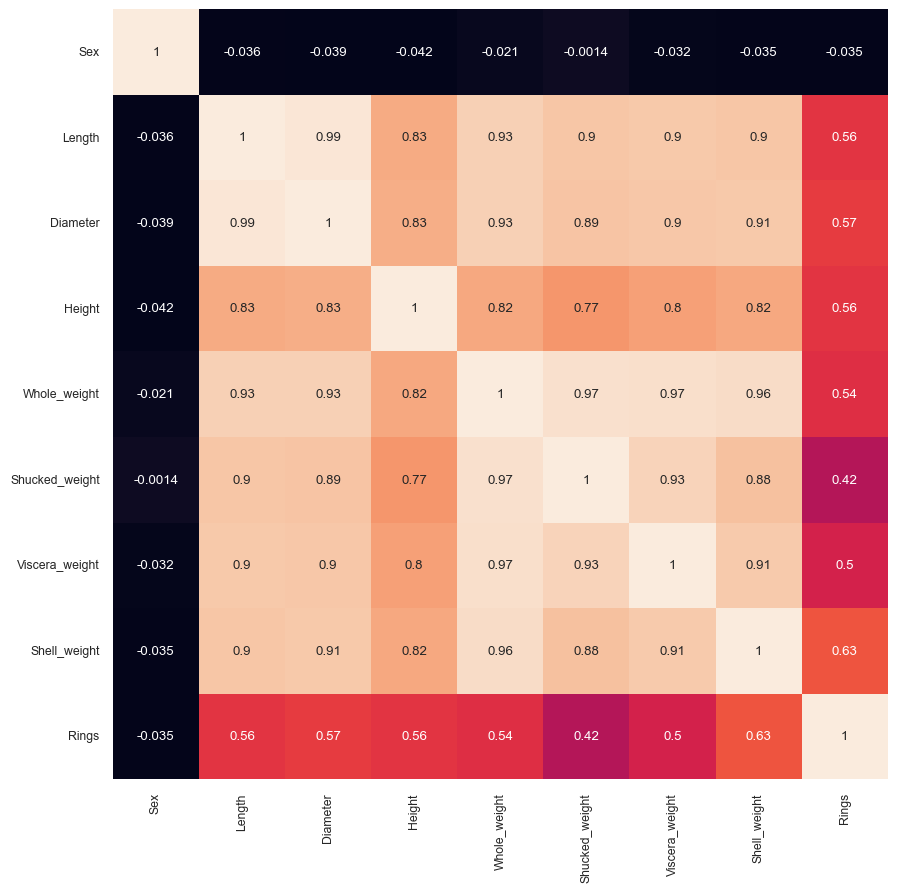

In [68]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [30]:
df['Rings'].value_counts

<bound method IndexOpsMixin.value_counts of id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64>

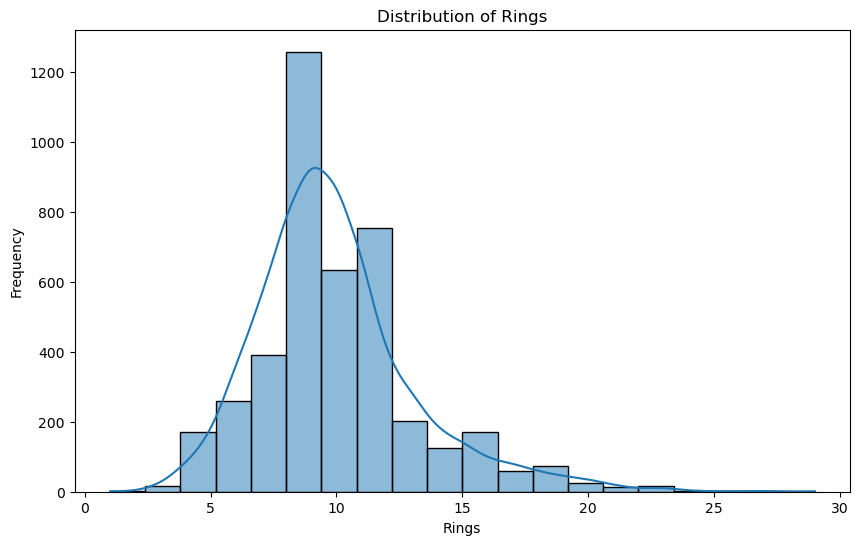

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

## 데이터 전처리

In [36]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [70]:
X = df.drop(['Rings'], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [72]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE: {mse_lr:.2f}")
print(f"R2: {r2_lr:.2f}")

MSE: 5.06
R2: 0.53


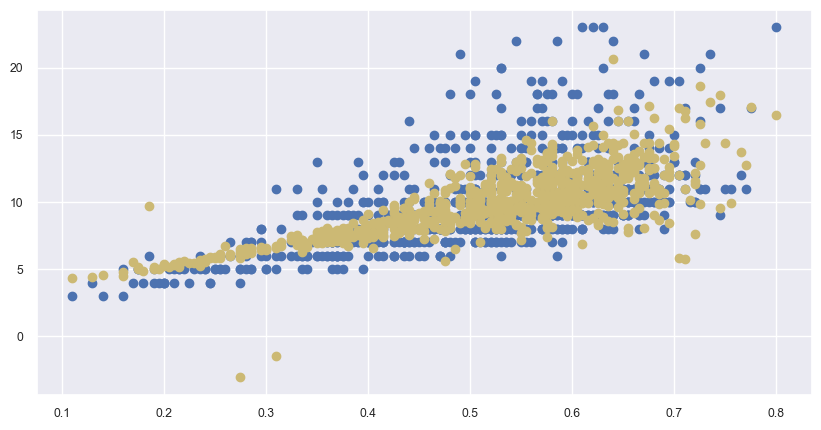

In [87]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], y_pred_lr, c='y', label='y_pred_lr')
plt.show()

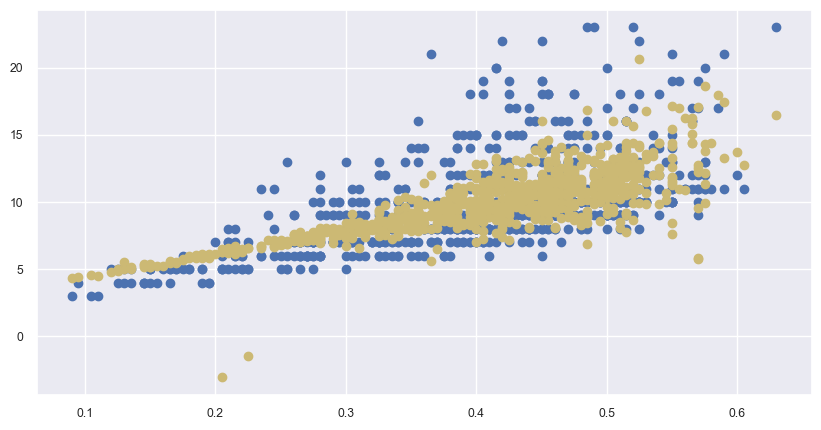

In [89]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], y_pred_lr, c='y', label='y_pred_lr')
plt.show()

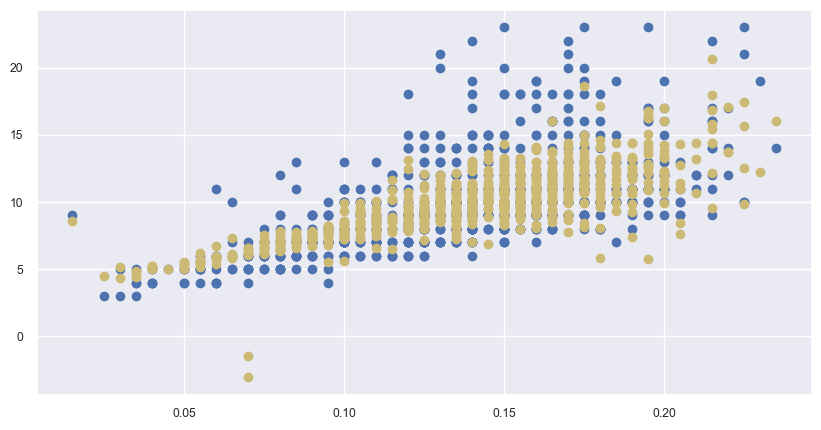

In [91]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Height'], y_test, label='y_test')
plt.scatter(X_test['Height'], y_pred_lr, c='y', label='y_pred_lr')
plt.show()

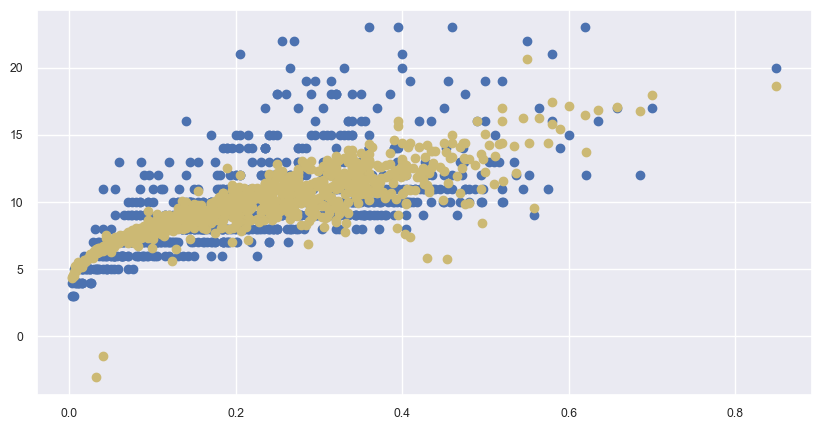

In [93]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], y_pred_lr, c='y', label='y_pred_lr')
plt.show()

# DT Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [103]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("--- DT Regression ---")
print(f"MSE DT: {mse_dt:2f}")
print(f"R2 DT: {r2:2f}")

--- DT Regression ---
MSE DT: 9.819378
R2 DT: 0.092916


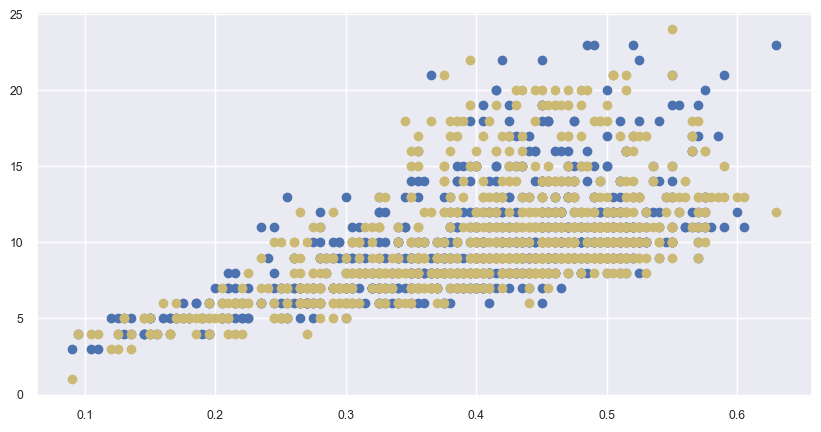

In [161]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], y_pred_dt, c='y', label='y_pred_dt')
plt.show()

# SVR Regression

In [146]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

In [147]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("--- SVR Regression ---")
print(f"MSE SVR: {mse_svr:.2f}")
print(f"R2 SVR: {r2_svr:.2f}")

--- SVR Regression ---
MSE SVR: 5.46
R2 SVR: 0.50


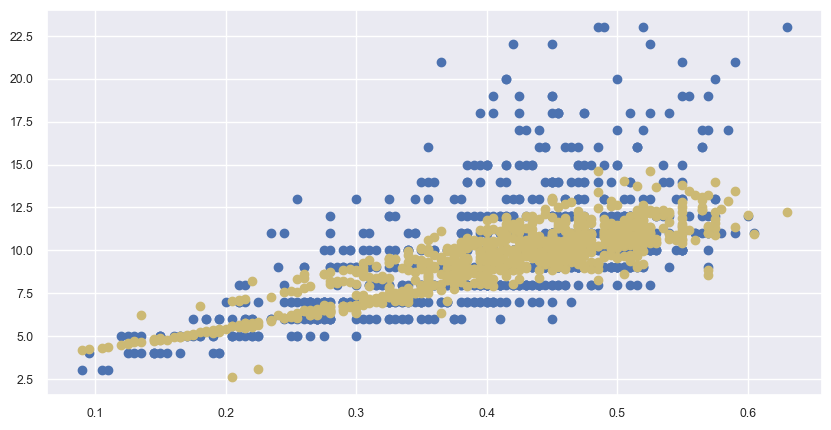

In [148]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], y_pred_svr, c='y', label='y_pred_svr')
plt.show()

# RF Regression

In [153]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [154]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [157]:
print("--- RF Regression ---")
print(f'MSE RF: {mse_rf:.2f}')
print(f"R2 RF: {r2_rf:.2f}")

--- RF Regression ---
MSE RF: 5.09
R2 RF: 0.53


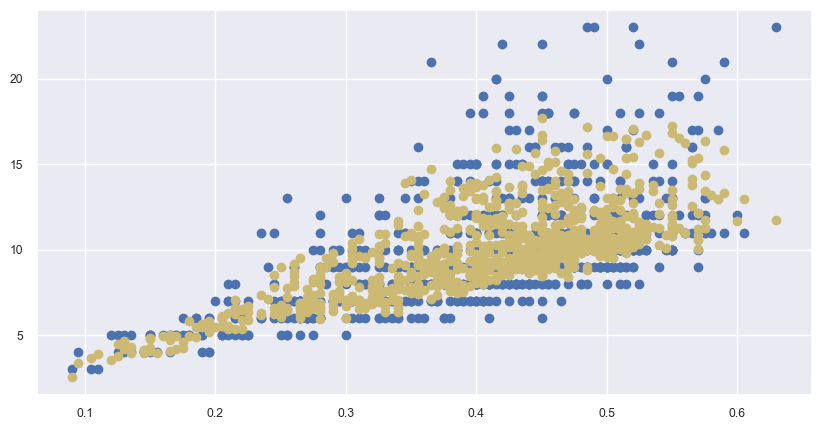

In [159]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Diameter'], y_test, label='y_test')
plt.scatter(X_test['Diameter'], y_pred_rf, c='y', label='y_pred_rf')
plt.show()